![A soccer pitch for an international match.](soccer-pitch.jpg)

You're working as a sports journalist at a major online sports media company, specializing in soccer analysis and reporting. You've been watching both men's and women's international soccer matches for a number of years, and your gut instinct tells you that more goals are scored in women's international football matches than men's. This would make an interesting investigative article that your subscribers are bound to love, but you'll need to perform a valid statistical hypothesis test to be sure!

While scoping this project, you acknowledge that the sport has changed a lot over the years, and performances likely vary a lot depending on the tournament, so you decide to limit the data used in the analysis to only official `FIFA World Cup` matches (not including qualifiers) since `2002-01-01`.

You create two datasets containing the results of every official men's and women's international football match since the 19th century, which you scraped from a reliable online source. This data is stored in two CSV files: `women_results.csv` and `men_results.csv`.

The question you are trying to determine the answer to is:

> Are more goals scored in women's international soccer matches than men's?

You assume a **10% significance level**, and use the following null and alternative hypotheses:

$H_0$ : The mean number of goals scored in women's international soccer matches is the same as men's.

$H_A$ : The mean number of goals scored in women's international soccer matches is greater than men's.

In [6]:
# Start your code here!
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu
import pingouin


women_df = pd.read_csv("women_results.csv")
women_df.drop(columns=["Unnamed: 0"], inplace=True)
men_df = pd.read_csv("men_results.csv")
men_df.drop(columns=["Unnamed: 0"], inplace=True)

In [7]:
women_df.head()

,date,home_team,away_team,home_score,away_score,tournament
0,1969-11-01,Italy,France,1,0,Euro
1,1969-11-01,Denmark,England,4,3,Euro
2,1969-11-02,England,France,2,0,Euro
3,1969-11-02,Italy,Denmark,3,1,Euro
4,1975-08-25,Thailand,Australia,3,2,AFC Championship


In [8]:
men_df.head()

,date,home_team,away_team,home_score,away_score,tournament
0,1872-11-30,Scotland,England,0,0,Friendly
1,1873-03-08,England,Scotland,4,2,Friendly
2,1874-03-07,Scotland,England,2,1,Friendly
3,1875-03-06,England,Scotland,2,2,Friendly
4,1876-03-04,Scotland,England,3,0,Friendly


In [9]:
# Convert dates to datetime datatypes

women_df["date"] = pd.to_datetime(women_df["date"], format='%Y-%m-%d')
men_df["date"] = pd.to_datetime(men_df["date"], format='%Y-%m-%d')

In [10]:
women_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4884 entries, 0 to 4883
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        4884 non-null   datetime64[ns]
 1   home_team   4884 non-null   object        
 2   away_team   4884 non-null   object        
 3   home_score  4884 non-null   int64         
 4   away_score  4884 non-null   int64         
 5   tournament  4884 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 229.1+ KB


In [11]:
men_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44353 entries, 0 to 44352
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        44353 non-null  datetime64[ns]
 1   home_team   44353 non-null  object        
 2   away_team   44353 non-null  object        
 3   home_score  44353 non-null  int64         
 4   away_score  44353 non-null  int64         
 5   tournament  44353 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 2.0+ MB


In [12]:
# Filter the dataset to only include matches from FIFA World Cup and from 2002-01-01

women_df_filtered = women_df[(women_df["date"]>"2002-01-01")&(women_df["tournament"].isin(["FIFA World Cup"]))]
women_df_filtered.head()

,date,home_team,away_team,home_score,away_score,tournament
1600,2003-09-20,Nigeria,North Korea,0,3,FIFA World Cup
1601,2003-09-20,Norway,France,2,0,FIFA World Cup
1602,2003-09-20,Germany,Canada,4,1,FIFA World Cup
1603,2003-09-20,Japan,Argentina,6,0,FIFA World Cup
1604,2003-09-21,United States,Sweden,3,1,FIFA World Cup


In [13]:
men_df_filtered = men_df[(men_df["date"]>"2002-01-01")&(men_df["tournament"].isin(["FIFA World Cup"]))]
men_df_filtered.head()

,date,home_team,away_team,home_score,away_score,tournament
25164,2002-05-31,France,Senegal,0,1,FIFA World Cup
25165,2002-06-01,Germany,Saudi Arabia,8,0,FIFA World Cup
25166,2002-06-01,Republic of Ireland,Cameroon,1,1,FIFA World Cup
25167,2002-06-01,Uruguay,Denmark,1,2,FIFA World Cup
25168,2002-06-02,Argentina,Nigeria,1,0,FIFA World Cup


H_0: mean_goals_women = mean_goals_men

H_A: mean_goals_women > mean_goals_men

alpha = 0.10   


Expected Output:
result_dict = {"p_val": p_val, "result": result}

where p_val is the p-value and result is either the string "fail to reject" or "reject", depending on the result of the test.

In [14]:
# Create a total_goals column per group as well as a group column with values "men" or "women"

men_df_filtered["total_goals"] = men_df_filtered["home_score"] + men_df_filtered["away_score"]
men_df_filtered["group"] = "men"

women_df_filtered["total_goals"] = women_df_filtered["home_score"] + women_df_filtered["away_score"]
women_df_filtered["group"] = "women"

C:\Users\Kurt Matthew Amodia\AppData\Local\Temp\ipykernel_10700\71219147.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  men_df_filtered["total_goals"] = men_df_filtered["home_score"] + men_df_filtered["away_score"]
C:\Users\Kurt Matthew Amodia\AppData\Local\Temp\ipykernel_10700\71219147.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  men_df_filtered["group"] = "men"
C:\Users\Kurt Matthew Amodia\AppData\Local\Temp\ipykernel_10700\71219147.py:6: SettingWithCopyWarning: 
A value is trying to be set on

In [15]:
men_df_filtered.head()

,date,home_team,away_team,home_score,away_score,tournament,total_goals,group
25164,2002-05-31,France,Senegal,0,1,FIFA World Cup,1,men
25165,2002-06-01,Germany,Saudi Arabia,8,0,FIFA World Cup,8,men
25166,2002-06-01,Republic of Ireland,Cameroon,1,1,FIFA World Cup,2,men
25167,2002-06-01,Uruguay,Denmark,1,2,FIFA World Cup,3,men
25168,2002-06-02,Argentina,Nigeria,1,0,FIFA World Cup,1,men


In [16]:
women_df_filtered.head()

,date,home_team,away_team,home_score,away_score,tournament,total_goals,group
1600,2003-09-20,Nigeria,North Korea,0,3,FIFA World Cup,3,women
1601,2003-09-20,Norway,France,2,0,FIFA World Cup,2,women
1602,2003-09-20,Germany,Canada,4,1,FIFA World Cup,5,women
1603,2003-09-20,Japan,Argentina,6,0,FIFA World Cup,6,women
1604,2003-09-21,United States,Sweden,3,1,FIFA World Cup,4,women


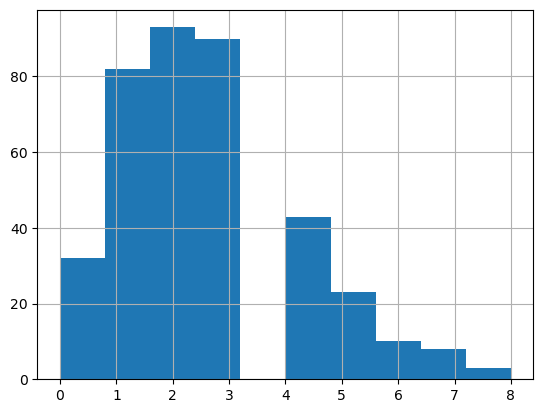

<Figure size 640x480 with 0 Axes>

In [17]:
# See if data is normal by plotting a histogram
men_df_filtered["total_goals"].hist()
plt.show()
plt.clf()

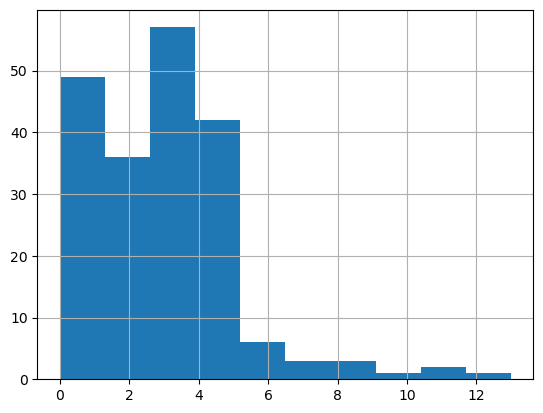

<Figure size 640x480 with 0 Axes>

In [18]:
# See if data is normal by plotting a histogram
women_df_filtered["total_goals"].hist()
plt.show()
plt.clf()

The data is not normally distributed so we can't use parametric tests. Since we are comparing two means of two independent groups, we will be using Mann Whitney U Test.

In [19]:
# Combine the two datasets into one

combined_df = pd.concat([men_df_filtered, women_df_filtered], axis=0, ignore_index=True)
combined_df.head()

,date,home_team,away_team,home_score,away_score,tournament,total_goals,group
0,2002-05-31,France,Senegal,0,1,FIFA World Cup,1,men
1,2002-06-01,Germany,Saudi Arabia,8,0,FIFA World Cup,8,men
2,2002-06-01,Republic of Ireland,Cameroon,1,1,FIFA World Cup,2,men
3,2002-06-01,Uruguay,Denmark,1,2,FIFA World Cup,3,men
4,2002-06-02,Argentina,Nigeria,1,0,FIFA World Cup,1,men


In [20]:
# Get important columns
combined_df_subset = combined_df[["total_goals", "group"]]
combined_df_subset.head()

,total_goals,group
0,1,men
1,8,men
2,2,men
3,3,men
4,1,men


In [21]:
# Transform to wide format for pingouin.mwu()

combined_df_subset_wide = combined_df_subset.pivot(columns="group", values="total_goals")
combined_df_subset_wide.head()

group,men,women
0,1.0,NaN
1,8.0,NaN
2,2.0,NaN
3,3.0,NaN
4,1.0,NaN


In [22]:
# Perform mann whitney u test

results_test = pingouin.mwu(x=combined_df_subset_wide["women"],
                            y=combined_df_subset_wide["men"],
                            alternative="greater")

results_test

,U-val,alternative,p-val,RBC,CLES
MWU,43273.0,greater,0.005107,0.126901,0.563451


In [23]:
# Compare p-value to alpha = 0.10 or 10%

p_value = results_test["p-val"].values[0] # Get first row of column p-value

if (p_value < 0.10):
    results_text = "reject"
else:
    results_text="fail to reject"

results_dict = {
    "p_val":p_value,
    "result":results_text
    }

print(results_dict)

{'p_val': 0.005106609825443641, 'result': 'reject'}


## Conclusion

Since the p-value (0.005106609825443641) is less than the significance level (0.10), we reject the null hypothesis, concluding that The mean number of goals scored in women's international soccer matches is greater men's.